In [1]:
import pandas as pd

data = pd.read_csv("./data/nyt1.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [2]:
data.Age.sort_values().unique()

array([  0,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 107, 108], dtype=int64)

In [3]:
data.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106
7,5,5,5,5
8,15,15,15,15
9,48,48,48,48
10,113,113,113,113
...,...,...,...,...
102,2,2,2,2
103,2,2,2,2
104,1,1,1,1


In [4]:
data[data.Age == 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,137106,137106,137106,137106


In [5]:
data[data.Age>0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,153070,153070,153070,153070
1,168265,168265,168265,168265


In [6]:
data_no_null_age = data[data.Age > 0]
data_no_null_age.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
7,5,5,5,5
8,15,15,15,15
9,48,48,48,48
10,113,113,113,113
11,283,283,283,283
...,...,...,...,...
102,2,2,2,2
103,2,2,2,2
104,1,1,1,1


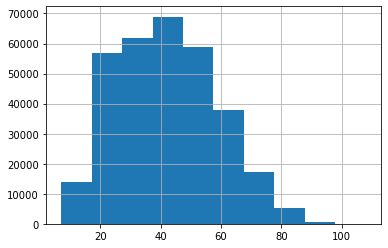

In [7]:
data_no_null_age.Age.hist()

In [8]:
#Task1

def ageGroups(age):
    if age < 18:
        return "1-17"
    elif 18 <= age < 25:
        return "18-24"
    elif 25 <= age < 35:
        return "25-34"
    elif 35 <= age < 45:
        return "35-44"
    elif 45 <= age < 55:
        return "45-54"
    elif 55 <= age < 65:
        return "55-64"
    elif age >= 64:
        return "65+"

age_group = data_no_null_age
age_group['AgeGroup'] = age_group.Age.apply(lambda row: ageGroups(row))
age_group

<ipython-input-8-9802b2fc131e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group['AgeGroup'] = age_group.Age.apply(lambda row: ageGroups(row))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [9]:
age_group[age_group.AgeGroup == "18-24"]

,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
11,21,0,3,0,1,18-24
25,19,1,4,0,1,18-24
26,19,0,3,0,1,18-24
29,21,1,5,0,1,18-24
30,23,0,4,0,1,18-24
...,...,...,...,...,...,...
458414,21,0,5,0,1,18-24
458423,22,1,8,0,1,18-24
458424,21,0,10,0,1,18-24
458431,21,1,5,0,1,18-24


In [10]:
age_group.groupby("AgeGroup").sum()

,Age,Gender,Impressions,Clicks,Signed_In
AgeGroup,,,,,
1-17,211045,9470,69239,2065,13828
18-24,847791,21721,203585,2167,40694
25-34,1716328,30958,290511,2937,58174
35-44,2798593,37676,355824,3662,70860
45-54,3181779,34007,322109,3232,64288
55-64,2661830,23988,224688,4556,44738
65+,2098644,10445,144120,4350,28753


In [11]:
age_group.groupby(["AgeGroup", "Gender"]).sum()

Age  Impressions  Clicks  Signed_In
AgeGroup Gender                                         
1-17     0         66443        21800     683       4358
         1        144602        47439    1382       9470
18-24    0        395265        95057    1002      18973
         1        452526       108528    1165      21721
25-34    0        802877       136292    1388      27216
         1        913451       154219    1549      30958
35-44    0       1310798       166324    1707      33184
         1       1487795       189500    1955      37676
45-54    0       1498737       151650    1542      30281
         1       1683042       170459    1690      34007
55-64    0       1235139       104220    2105      20750
         1       1426691       120468    2451      23988
65+      0       1337551        91956    2765      18308
         1        761093        52164    1585      10445

In [12]:
#Task2
data_by_group = age_group.groupby('AgeGroup').sum()
data_by_group["CTR"] = data_by_group.Clicks/data_by_group.Impressions
data_by_group


,Age,Gender,Impressions,Clicks,Signed_In,CTR
AgeGroup,,,,,,
1-17,211045,9470,69239,2065,13828,0.029824
18-24,847791,21721,203585,2167,40694,0.010644
25-34,1716328,30958,290511,2937,58174,0.010110
35-44,2798593,37676,355824,3662,70860,0.010292
45-54,3181779,34007,322109,3232,64288,0.010034
55-64,2661830,23988,224688,4556,44738,0.020277
65+,2098644,10445,144120,4350,28753,0.030183


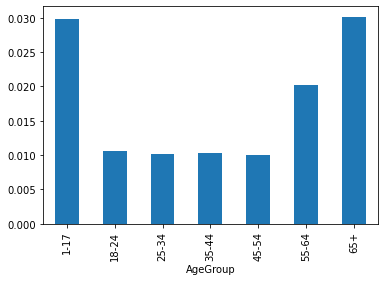

In [13]:
data_by_group.CTR.plot(kind = "bar")

In [14]:
def gender_classify(Gender):
    if Gender == 0:
        return "Male"
    elif Gender == 1:
        return "Female"

data_no_null_age["Gender"] = data_no_null_age.Gender.apply(lambda x : gender_classify(x))
data_no_null_age

<ipython-input-14-1fb10a6dd034>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["Gender"] = data_no_null_age.Gender.apply(lambda x : gender_classify(x))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,Male,3,0,1,35-44
1,73,Female,3,0,1,65+
2,30,Male,3,0,1,25-34
3,49,Female,3,0,1,45-54
4,47,Female,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,Male,4,0,1,25-34
458433,21,Female,2,0,1,18-24
458434,61,Female,6,0,1,55-64
458435,51,Male,7,0,1,45-54


In [15]:
data_from_18 = data_no_null_age[data_no_null_age.Age > 18]
data_from_18.sort_values('Age')

,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
73750,19,Male,12,0,1,18-24
247489,19,Female,3,0,1,18-24
376985,19,Female,5,0,1,18-24
178097,19,Male,4,0,1,18-24
108947,19,Female,4,0,1,18-24
...,...,...,...,...,...,...
195508,103,Male,4,0,1,65+
436709,104,Female,6,1,1,65+
217137,107,Female,4,0,1,65+
347859,107,Female,5,1,1,65+


In [16]:
data_from_18.groupby("Gender").mean().drop(columns="Signed_In")

,Age,Impressions,Clicks
Gender,,,
Female,42.799318,5.009653,0.065053
Male,44.703728,5.013107,0.070488


In [17]:
data_from_18["CTR"] = data_from_18.Clicks / data_from_18.Impressions
data_from_18.sort_values('Age')

<ipython-input-17-7799c2b79745>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_from_18["CTR"] = data_from_18.Clicks / data_from_18.Impressions


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup,CTR
73750,19,Male,12,0,1,18-24,0.000000
247489,19,Female,3,0,1,18-24,0.000000
376985,19,Female,5,0,1,18-24,0.000000
178097,19,Male,4,0,1,18-24,0.000000
108947,19,Female,4,0,1,18-24,0.000000
...,...,...,...,...,...,...,...
195508,103,Male,4,0,1,65+,0.000000
436709,104,Female,6,1,1,65+,0.166667
217137,107,Female,4,0,1,65+,0.000000
347859,107,Female,5,1,1,65+,0.200000


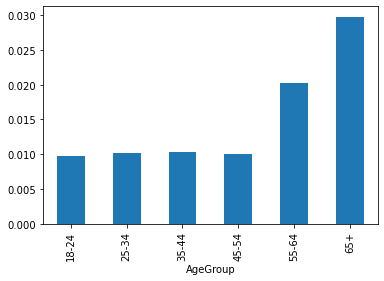

In [18]:
data_from_18.groupby("AgeGroup").CTR.mean().plot(kind="bar")

In [19]:
result = data_from_18.groupby("AgeGroup").mean().drop(columns="Signed_In")
result.rename(columns={"Impressions":"Impressions mean", "Clicks":"Clicks mean"}, inplace = True)
result

,Age,Impressions mean,Clicks mean,CTR
AgeGroup,,,,
18-24,21.269039,5.006635,0.048455,0.009720
25-34,29.503352,4.993829,0.050486,0.010146
35-44,39.494680,5.021507,0.051679,0.010286
45-54,49.492580,5.010406,0.050274,0.009958
55-64,59.498189,5.022308,0.101837,0.020307
65+,72.988697,5.012347,0.151289,0.029803


In [20]:
result['CTR_quantile']=data_from_18.groupby("AgeGroup").CTR.quantile(q=0.95)
result

,Age,Impressions mean,Clicks mean,CTR,CTR_quantile
AgeGroup,,,,,
18-24,21.269039,5.006635,0.048455,0.009720,0.000000
25-34,29.503352,4.993829,0.050486,0.010146,0.000000
35-44,39.494680,5.021507,0.051679,0.010286,0.090909
45-54,49.492580,5.010406,0.050274,0.009958,0.000000
55-64,59.498189,5.022308,0.101837,0.020307,0.166667
65+,72.988697,5.012347,0.151289,0.029803,0.200000


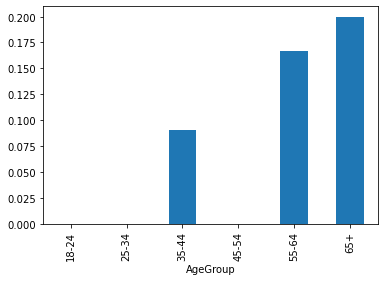

In [21]:

result.CTR_quantile.plot(kind="bar")

In [22]:
result['Impressions_max']=data_from_18.groupby("AgeGroup").Impressions.max()
result

,Age,Impressions mean,Clicks mean,CTR,CTR_quantile,Impressions_max
AgeGroup,,,,,,
18-24,21.269039,5.006635,0.048455,0.009720,0.000000,17
25-34,29.503352,4.993829,0.050486,0.010146,0.000000,17
35-44,39.494680,5.021507,0.051679,0.010286,0.090909,20
45-54,49.492580,5.010406,0.050274,0.009958,0.000000,17
55-64,59.498189,5.022308,0.101837,0.020307,0.166667,16
65+,72.988697,5.012347,0.151289,0.029803,0.200000,16


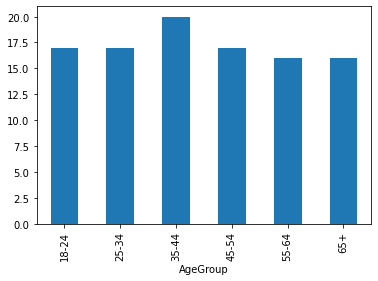

In [23]:
result.Impressions_max.plot(kind="bar")

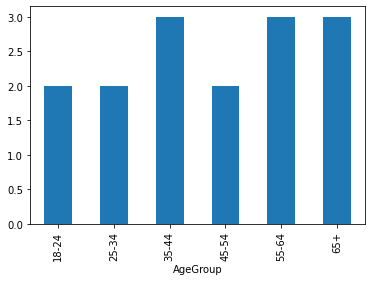

In [24]:
result['Clicks_max']=data_from_18.groupby("AgeGroup").Clicks.max()
result.Clicks_max.plot(kind="bar")

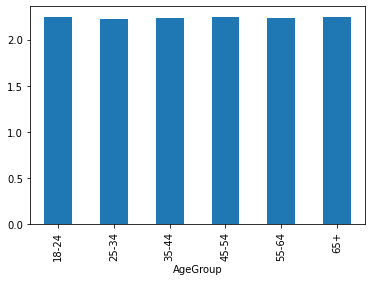

In [25]:
result["Impressions_dispersion"]=data_from_18.groupby("AgeGroup").Impressions.std()
result.Impressions_dispersion.plot(kind="bar")

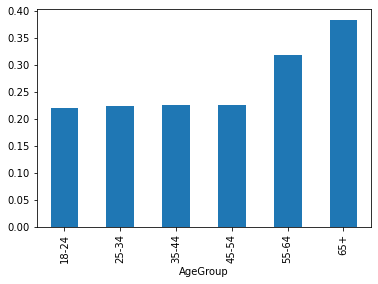

In [26]:
result["Clicks_dispersion"]=data_from_18.groupby("AgeGroup").Clicks.std()
result.Clicks_dispersion.plot(kind="bar")

In [27]:
#Task3

def data_analysis(day):

    data_day = pd.read_csv(f"./data/nyt{day}.csv")

    data_day_no_null_age = data_day[(data_day.Age > 0)]
    age_group = data_day_no_null_age
    age_group["AgeGroup"] = age_group.Age.apply(lambda x: ageGroups(x))

    data_from_18 = age_group[age_group.Age > 18]
    data_from_18 = data_from_18.drop(columns="Signed_In")
    data_from_18["Gender"] = data_from_18.Gender.apply(lambda x: gender_classify(x))
    data_from_18["CTR"] = data_from_18.Clicks / data_from_18.Impressions

    result = data_from_18.groupby("AgeGroup").mean()
    result.rename(columns={"Impressions": "Impressions_mean", "Clicks": "Clicks_mean"}, inplace=True)
    result["CTR_quantile"] = data_from_18.groupby("AgeGroup").CTR.quantile(q=0.95)
    result["Impressions_max"] = data_from_18.groupby("AgeGroup").Impressions.max()
    result["Clicks_max"] = data_from_18.groupby("AgeGroup").Clicks.max()
    result["Impressions_dispersion"] = data_from_18.groupby("AgeGroup").Impressions.std()
    result["Clicks_dispersion"] = data_from_18.groupby("AgeGroup").Clicks.std()

    return result


data_analysis(4)

<ipython-input-27-d8304a429e6f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group["AgeGroup"] = age_group.Age.apply(lambda x: ageGroups(x))


,Age,Impressions_mean,Clicks_mean,CTR,CTR_quantile,Impressions_max,Clicks_max,Impressions_dispersion,Clicks_dispersion
AgeGroup,,,,,,,,,
18-24,21.266569,4.998862,0.049008,0.009717,0.000000,16,3,2.251371,0.221623
25-34,29.493221,4.994947,0.050135,0.010148,0.000000,17,3,2.240874,0.223034
35-44,39.490211,4.997100,0.050827,0.010060,0.000000,17,3,2.232983,0.225663
45-54,49.504917,4.987168,0.051295,0.010065,0.083333,17,3,2.233218,0.226401
55-64,59.506138,5.007956,0.100752,0.020192,0.166667,17,3,2.233261,0.317994
65+,72.978785,5.029751,0.149906,0.029551,0.200000,16,3,2.234815,0.387375


<ipython-input-27-d8304a429e6f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group["AgeGroup"] = age_group.Age.apply(lambda x: ageGroups(x))


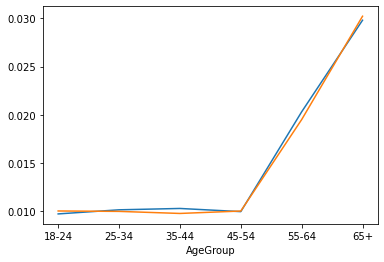

In [28]:
ax = result.CTR.plot()
data_analysis(5).CTR.plot(ax=ax)